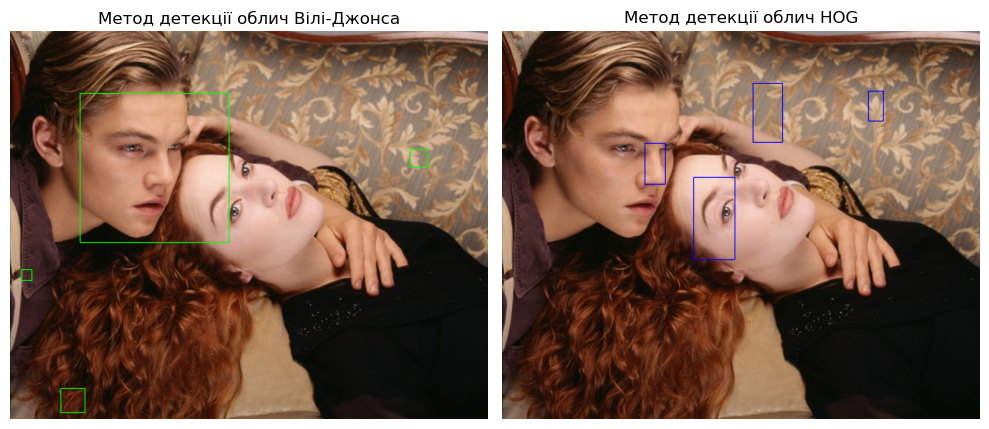

In [14]:
import cv2
import matplotlib.pyplot as plt

# Завантаження зображення
image = cv2.imread('titanic.jpg')

# Метод детекції облич Вілі-Джонса
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Копіюємо зображення для відображення результатів
image_with_faces = image.copy()

# Малюємо прямокутники навколо облич
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_faces, (x, y), (x + w, y + h), (0, 255, 0), 4)

# Метод детекції облич HOG
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
boxes, weights = hog.detectMultiScale(image, winStride=(8, 8), padding=(4, 4), scale=1.05)

# Копіюємо зображення для відображення результатів
image_with_hog = image.copy()

# Малюємо прямокутники навколо облич
for (x, y, w, h) in boxes:
    cv2.rectangle(image_with_hog, (x, y), (x + w, y + h), (255, 0, 0), 4)

# Відображення результатів
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image_with_faces, cv2.COLOR_BGR2RGB))
axes[0].set_title('Метод детекції облич Вілі-Джонса')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(image_with_hog, cv2.COLOR_BGR2RGB))
axes[1].set_title('Метод детекції облич HOG')
axes[1].axis('off')

plt.tight_layout()
plt.show()
